## Observations and Insights 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID") 

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
combined_data_df['Mouse ID'].nunique()

249

In [30]:
combined_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']

clean_combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

statistics_df = pd.DataFrame({'Mean':mean, 
                              'Median':median, 
                              'Variance':variance, 
                              'Standard Deviation':std, 
                              'SEM':sem})

statistics_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = clean_combined_data_df.groupby('Drug Regimen')

tumor_mean = summary_statistics_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_statistics_df["Tumor Volume (mm3)"].median()
tumor_var = summary_statistics_df["Tumor Volume (mm3)"].var()
tumor_std = summary_statistics_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_statistics_df["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({'Mean':tumor_mean, 
                                      'Median':tumor_median, 'Variance':tumor_var, 
                                      'Standard Deviation':tumor_std, 
                                      'SEM':tumor_sem})

summary_statistics_df

# This method produces everything in a single groupby function

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Group the cleaned data by Drug Regimen and show the number of unique mice that each drug was used in tumor treatment
mice_drug_group = clean_combined_data_df.groupby('Drug Regimen')
number_mice_drug = mice_drug_group["Mouse ID"].nunique()

number_mice_drug

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [10]:
# Create a Dataframe from this series
number_mice_drug_df = pd.DataFrame({"Number of Mice": number_mice_drug})

number_mice_drug_df

,Number of Mice
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


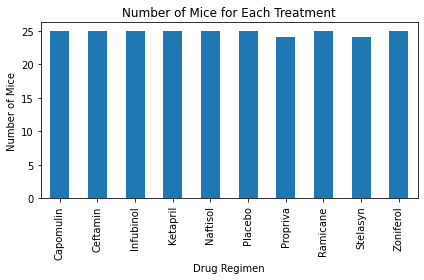

In [11]:
# Create a bar chart from the previously created series
mice_drug_bar = number_mice_drug.plot(kind='bar')

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

plt.show()

In [12]:
# Specify x and y axis values for alternate bar plot creation
x_axis = number_mice_drug_df.index
y_axis = number_mice_drug_df["Number of Mice"].tolist()

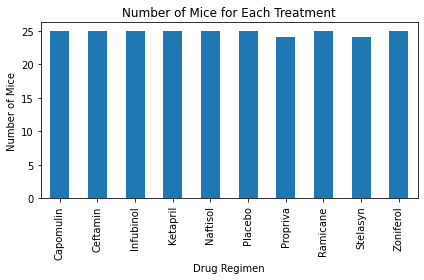

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
number_mice_drug_df.plot(kind='bar', legend=False)

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

plt.show()

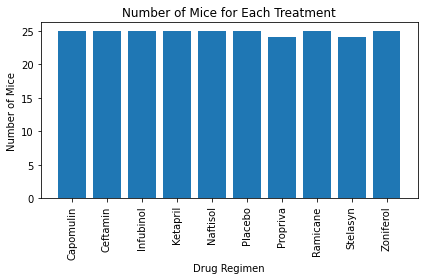

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x_axis, y_axis)

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [15]:
# Group the cleaned data to find the distribution of female versus male mice
sex_group = clean_combined_data_df.groupby('Sex')
sex_count = sex_group["Mouse ID"].nunique()

sex_count

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [16]:
# Create a Dataframe from this series
sex_count_df = pd.DataFrame({"Number of Mice": sex_count})

sex_count_df

,Number of Mice
Sex,
Female,123
Male,125


In [17]:
# Specify labels, values and colours for pie plot creation
labels = sex_count_df.index
values = sex_count_df["Number of Mice"].tolist()
colors = ["pink", "lightblue"]

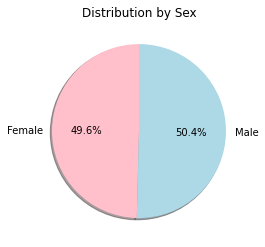

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = sex_count.plot.pie(autopct="%1.1f%%", ylabel=(''), colors=colors, shadow=True, startangle=90, title='Distribution by Sex')

plt.show()

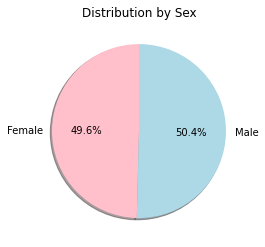

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)

plt.title("Distribution by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [82]:
clean_data_df = clean_combined_data_df.set_index('Mouse ID')
tumor_volume_df = clean_data_df[['Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]


tumor_volume_df.head()

,Timepoint,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,,
k403,0,Ramicane,45.000000
k403,5,Ramicane,38.825898
k403,10,Ramicane,35.014271
k403,15,Ramicane,34.223992
k403,20,Ramicane,32.997729


In [83]:
last_timepoint = tumor_volume_df.loc[tumor_volume_df['Timepoint'] == 45]
last_timepoint

,Timepoint,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,,
k403,45,Ramicane,22.050126
s185,45,Capomulin,23.343598
x401,45,Capomulin,28.484033
m601,45,Capomulin,28.430964
g791,45,Ramicane,29.128472
...,...,...,...
y769,45,Ceftamin,68.594745
y865,45,Ceftamin,64.729837
z581,45,Infubinol,62.754451


In [21]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
